# __Time series forecasting__

## __What is a time series?__

Anything that is observed sequentially over time with each observation associated to a timestamp is a time series. Whether there is any regular relationship beyond randomness between the timestamps and the target variable, is an additional questions and part of time series analyses befroe atte attempting forecasting.

## __Examples of applications__

- Daily stock prizes
- Monthly rainfall
- Quarterly sales results
- Annual profits

## __What can a time series forecast do?__

If there is a corrletaion between a target variable and the timestamps associated to it, time series forecasts cannot only forecast static datasets at constant environmental consitions (e.g. linear taget trajectory) but can also include environmental changes. Specifically, when a forecasting mdoel is trained on a dataset, the model identifies changing environmental conditions (trend, seasonality) and assumes them to be constantly changing in their forecasts.

When forecasting time series data, the aim is to estimate how the sequence of observations will continue into the future. The figure below shows the quarterly Australian beer production from 1992 to the second quarter of 2010. The blue lines show forecasting for two years, the dark shaded regions an 80 %, and the light shaded regions an 95 % confidence interval.

<img src="../images/australian_beer_production.png" width=700> <br/>
__Australian quarterly beer production with 2 years of forecasts.__

source: Hyndman and Athanasopoulos, Forecasting: Principles and Practice (https://otexts.com/fpp2/)

The simplest forecast models will only take the behaviour of the forecast variable over time into account without the explicit inclusion of any other exogenous predictors (such predictors might however be refelcted in the time series implicitly). Hence, the models analyse the trend and seasonaloty of any dataset and use their finding s for forecasts into the future.

## __Predictor variables and time series forecasting__

Let's assume we want to forecast the hourly electricity demand $ED$.

__Explanatory model:__

This describes what you have been mostly seeing so far in this course.

$ED = f(current\ temperature, strength\ of\ economy, population, time\ of\ day, day\ of\ week, error)$

__Time series forecasting equations__

This is what we will focus on in our course.

$ED_{t+1} = f(ED_t, ED_{t-1}, ED_{t-2}, ED_{t-3}, ... ,error)$

where $t$ is the current point of time.

__Mixed models__

Will see different examples of mixed models today.

$ED_{t+1} = f(ED_t, current\ temperature, time\ of\ day, day\ of\ week, error)$

## __Some simple forecasting methods__

Here, we will just shortly look at some of the simplest forecasting methods.

In [1]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='../images/drift.png' width='600'></td><td><img src='../images/seasonal_naive.png'width='600'></td></tr></table>"))

,


source: Hyndman and Athanasopoulos, Forecasting: Principles and Practice (https://otexts.com/fpp2/)

__Drift:__ This is equvalie to draw a line between the first and the last value and to extrapolate the line into the future..

__Mean:__ Takes the mean of the existing dartaset over time and adds it to that very dataset as a forecast.

__Naive:__ Takes the target value of the last timestgamp of the exisitng dataset and adds that value to it as a forecast.

__Seasonal naive:__ Takes the target value of the same time point of the __LAST__ season and uses it as a forecast value.

## __Basic time series methods in Python__

In [2]:
import pandas as pd
import numpy as np

### __Dates and Times__

#### __Timestamps__

In [3]:
#create a date range
rng = pd.date_range('2016 Jul 1', periods = 10, freq = 'D')
rng

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.Timestamp('2016-07-10')

Timestamp('2016-07-10 00:00:00')

In [5]:
# You can add more details
pd.Timestamp('2016-07-10 10')

Timestamp('2016-07-10 10:00:00')

In [6]:
#and more
pd.Timestamp('2016-07-10 10:15')

Timestamp('2016-07-10 10:15:00')

In [7]:
#creation of timestamp object variable
t = pd.Timestamp('2016-07-10 10:15')

#### __Time spans__

In [8]:
pd.Period('2016-01')

Period('2016-01', 'M')

In [9]:
pd.Period('2016-01-01')

Period('2016-01-01', 'D')

In [10]:
pd.Period('2016-01-01 10')

Period('2016-01-01 10:00', 'H')

In [11]:
pd.Period('2016-01-01 10:10')

Period('2016-01-01 10:10', 'T')

In [12]:
pd.Period('2016-01-01 10:10:10')

Period('2016-01-01 10:10:10', 'S')

#### __Time offsets__

In [13]:
pd.Timedelta('1 day')

Timedelta('1 days 00:00:00')

In [14]:
pd.Period('2016-01-01 10:10') + pd.Timedelta('1 day')

Period('2016-01-02 10:10', 'T')

In [15]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('1 day')

Timestamp('2016-01-02 10:10:00')

In [16]:
pd.Timestamp('2016-01-01 10:10') + pd.Timedelta('15 ns')

Timestamp('2016-01-01 10:10:00.000000015')

#### __Frequency settings__

In [17]:
#only businsess days:
pd.period_range('2016-01-01 10:10', freq = 'B', periods = 10)

PeriodIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
             '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
             '2016-01-13', '2016-01-14'],
            dtype='period[B]', freq='B')

In [18]:
# It's possible to combine frequencies. What if you want to advance by 25 hours each day. What are the 2 ways to do it?
p1 = pd.period_range('2016-01-01 10:10', freq = '25H', periods = 10)

In [19]:
p2 = pd.period_range('2016-01-01 10:10', freq = '1D1H', periods = 10)

In [20]:
p1

PeriodIndex(['2016-01-01 10:00', '2016-01-02 11:00', '2016-01-03 12:00',
             '2016-01-04 13:00', '2016-01-05 14:00', '2016-01-06 15:00',
             '2016-01-07 16:00', '2016-01-08 17:00', '2016-01-09 18:00',
             '2016-01-10 19:00'],
            dtype='period[25H]', freq='25H')

In [21]:
p2

PeriodIndex(['2016-01-01 10:00', '2016-01-02 11:00', '2016-01-03 12:00',
             '2016-01-04 13:00', '2016-01-05 14:00', '2016-01-06 15:00',
             '2016-01-07 16:00', '2016-01-08 17:00', '2016-01-09 18:00',
             '2016-01-10 19:00'],
            dtype='period[25H]', freq='25H')

In [22]:
# Timestamped data can be convereted to period indices with to_period and vice versa with to_timestamp
ts = pd.Series(range(10), pd.date_range('07-10-16 8:00', periods = 10, freq = 'H'))
ts

2016-07-10 08:00:00    0
2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
2016-07-10 12:00:00    4
2016-07-10 13:00:00    5
2016-07-10 14:00:00    6
2016-07-10 15:00:00    7
2016-07-10 16:00:00    8
2016-07-10 17:00:00    9
Freq: H, dtype: int64

In [23]:
ts_period = ts.to_period()
ts_period

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
2016-07-10 12:00    4
2016-07-10 13:00    5
2016-07-10 14:00    6
2016-07-10 15:00    7
2016-07-10 16:00    8
2016-07-10 17:00    9
Freq: H, dtype: int64

In [24]:
ts_period['2016-07-10 08:30':'2016-07-10 11:45'] # we have the concept of overlap with time periods

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
Freq: H, dtype: int64

In [25]:
ts['2016-07-10 08:30':'2016-07-10 11:45'] # we have the concept of include with timestamps

2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
Freq: H, dtype: int64

### __Time zone handling__

In [26]:
rng = pd.date_range('3/6/2012 00:00', periods = 15, freq = 'D')
rng.tz

In [27]:
rng_tz = pd.date_range('3/6/2012 00:00', periods = 15, freq = 'D', tz = 'Europe/London')
rng_tz.tz

<DstTzInfo 'Europe/London' LMT-1 day, 23:59:00 STD>

In [28]:
from pytz import common_timezones, all_timezones
print(len(common_timezones))
print(len(all_timezones))
print(set(all_timezones) - set(common_timezones))

440
592
{'Australia/NSW', 'GMT0', 'Africa/Asmera', 'Etc/GMT-14', 'ROC', 'Asia/Thimbu', 'Etc/GMT', 'America/Virgin', 'Etc/Zulu', 'MET', 'America/Argentina/ComodRivadavia', 'America/Catamarca', 'EST5EDT', 'Atlantic/Jan_Mayen', 'Europe/Tiraspol', 'Etc/GMT+10', 'Iceland', 'Asia/Katmandu', 'Etc/GMT+9', 'Antarctica/South_Pole', 'Asia/Ulan_Bator', 'Chile/EasterIsland', 'America/Cordoba', 'Mexico/General', 'Turkey', 'Asia/Istanbul', 'Etc/GMT-8', 'America/Rosario', 'W-SU', 'Australia/Yancowinna', 'America/Louisville', 'Europe/Nicosia', 'Zulu', 'Asia/Tel_Aviv', 'America/Atka', 'MST7MDT', 'GMT+0', 'GMT-0', 'Asia/Ujung_Pandang', 'Etc/GMT+0', 'Navajo', 'Poland', 'Cuba', 'Africa/Timbuktu', 'Australia/South', 'Singapore', 'Asia/Chungking', 'Etc/GMT-7', 'US/Indiana-Starke', 'US/Michigan', 'America/Buenos_Aires', 'PRC', 'MST', 'Iran', 'Pacific/Truk', 'Etc/GMT+12', 'America/Fort_Wayne', 'Etc/GMT-0', 'Australia/West', 'ROK', 'HST', 'America/Montreal', 'Brazil/East', 'Etc/Universal', 'WET', 'Pacific/Johns

In [29]:
#localisation of naive timestamp
t_naive = pd.Timestamp('2016-07-10 08:50')
t_naive

Timestamp('2016-07-10 08:50:00')

In [30]:
t = t_naive.tz_localize(tz = 'US/Central')
t

Timestamp('2016-07-10 08:50:00-0500', tz='US/Central')

In [31]:
t.tz_convert('Asia/Tokyo')

Timestamp('2016-07-10 22:50:00+0900', tz='Asia/Tokyo')

In [32]:
#handling of daylight saving
rng = pd.date_range('2016-03-10', periods=10, tz='US/Central')
ts = pd.Series(range(10), index=rng)
ts

2016-03-10 00:00:00-06:00    0
2016-03-11 00:00:00-06:00    1
2016-03-12 00:00:00-06:00    2
2016-03-13 00:00:00-06:00    3
2016-03-14 00:00:00-05:00    4
2016-03-15 00:00:00-05:00    5
2016-03-16 00:00:00-05:00    6
2016-03-17 00:00:00-05:00    7
2016-03-18 00:00:00-05:00    8
2016-03-19 00:00:00-05:00    9
Freq: D, dtype: int64

In [33]:
rng = pd.date_range('2016-03-10', periods=10, tz='utc')
ts = pd.Series(range(10), index=rng)
ts

2016-03-10 00:00:00+00:00    0
2016-03-11 00:00:00+00:00    1
2016-03-12 00:00:00+00:00    2
2016-03-13 00:00:00+00:00    3
2016-03-14 00:00:00+00:00    4
2016-03-15 00:00:00+00:00    5
2016-03-16 00:00:00+00:00    6
2016-03-17 00:00:00+00:00    7
2016-03-18 00:00:00+00:00    8
2016-03-19 00:00:00+00:00    9
Freq: D, dtype: int64

In [34]:
ts.tz_convert('US/Central')

2016-03-09 18:00:00-06:00    0
2016-03-10 18:00:00-06:00    1
2016-03-11 18:00:00-06:00    2
2016-03-12 18:00:00-06:00    3
2016-03-13 19:00:00-05:00    4
2016-03-14 19:00:00-05:00    5
2016-03-15 19:00:00-05:00    6
2016-03-16 19:00:00-05:00    7
2016-03-17 19:00:00-05:00    8
2016-03-18 19:00:00-05:00    9
Freq: D, dtype: int64

In [35]:
#what happens if one hour does not exist due to datetime saving time?
pd.Timestamp('2016-03-13 02:00:00', tz = 'US/Central')

NonExistentTimeError: 2016-03-13 02:00:00

### __Reading in data__

In [ ]:
#Parsing datetime columns
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

In [ ]:
pd.to_datetime(df)

In [ ]:
pd.to_datetime(df[['year', 'month', 'day']])

In [36]:
#truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='2015-10-31', after='2015-12-31')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int64

In [37]:
#truncate by indexing
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [38]:
ts.ix[0:10:2].index

/home/user/venvs/dsr_teaching/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')

### __Resampling__

In [39]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [40]:
ts

2011-01-01 00:00:00   -0.018071
2011-01-01 01:00:00   -1.272064
2011-01-01 02:00:00    0.772650
2011-01-01 03:00:00   -1.673108
2011-01-01 04:00:00    0.541102
                         ...   
2011-01-03 19:00:00   -0.325873
2011-01-03 20:00:00    1.440240
2011-01-03 21:00:00    0.494461
2011-01-03 22:00:00   -0.966664
2011-01-03 23:00:00   -0.352646
Freq: H, Length: 72, dtype: float64

In [41]:
converted = ts.asfreq('45Min', method='pad')

In [42]:
converted1 = ts.asfreq('45Min', method='backfill')

In [43]:
converted

2011-01-01 00:00:00   -0.018071
2011-01-01 00:45:00   -0.018071
2011-01-01 01:30:00   -1.272064
2011-01-01 02:15:00    0.772650
2011-01-01 03:00:00   -1.673108
                         ...   
2011-01-03 19:30:00   -0.325873
2011-01-03 20:15:00    1.440240
2011-01-03 21:00:00    0.494461
2011-01-03 21:45:00    0.494461
2011-01-03 22:30:00   -0.966664
Freq: 45T, Length: 95, dtype: float64

In [44]:
converted1

2011-01-01 00:00:00   -0.018071
2011-01-01 00:45:00   -1.272064
2011-01-01 01:30:00    0.772650
2011-01-01 02:15:00   -1.673108
2011-01-01 03:00:00   -1.673108
                         ...   
2011-01-03 19:30:00    1.440240
2011-01-03 20:15:00    0.494461
2011-01-03 21:00:00    0.494461
2011-01-03 21:45:00   -0.966664
2011-01-03 22:30:00   -0.352646
Freq: 45T, Length: 95, dtype: float64

In [45]:
converted = ts.asfreq('90Min', method = 'bfill')

In [46]:
ts.resample('D').sum()

2011-01-01   -1.416760
2011-01-02    1.782038
2011-01-03   -0.941496
Freq: D, dtype: float64

### __Moving window functions__

In [47]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [48]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

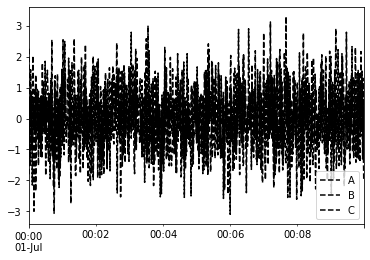

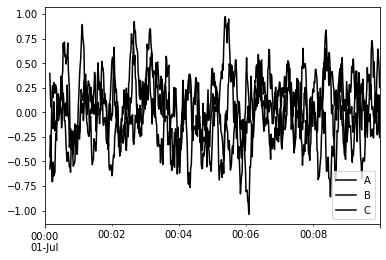

In [49]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [50]:
#Plotting rolling averages per columns
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [51]:
df.head()

,A,B,C,D
2016-06-06,0.014959,-0.128684,0.317760,0.179177
2016-06-07,-0.181676,-1.337074,-0.525380,0.587630
2016-06-08,-1.038573,-1.347925,-1.933999,-0.112845
2016-06-09,-0.715617,-0.730616,-0.507413,0.003705
2016-06-10,-0.313526,1.198176,-1.636786,0.423590


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d1d9b0d30>,
      dtype=object)

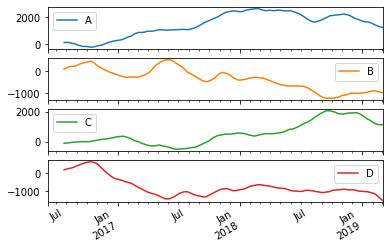

In [52]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [53]:
#apply a custom fucntion to your data using the .apply() method
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

/home/user/venvs/dsr_teaching/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-02-26,0.927047,1.302629,1.249083,1.004657
2019-02-27,0.834184,1.382056,1.249665,0.984360
2019-02-28,0.825674,1.300983,1.111910,0.847526
2019-03-01,0.882266,1.330136,0.865756,0.635717


In [54]:
#yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.075879,-0.797221,0.055070,0.472992
2016-06-08,-0.452349,-1.469375,-0.677160,0.533316
2016-06-09,-0.819489,-1.988106,-1.170128,0.564403
2016-06-10,-1.102478,-2.059709,-1.793266,0.667774


#### __log transformation__

In [55]:
import matplotlib.pyplot as plt

In [56]:
#the airline passengers dataset is a famous one to demonstrate time series forecasts
#we will see it at other occasions throughout this course
airline_passengers = pd.read_csv('../data/airline_passengers.csv')

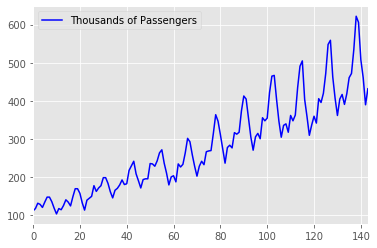

In [57]:
plt.style.use('ggplot')
airline_passengers.plot(color='blue');

__Note how the trend of this dataset increases exponentially and how the periodic amplitude increase as well.__

In [58]:
airline_passengers_log = airline_passengers['Thousands of Passengers'].apply(lambda x: np.log10(x))

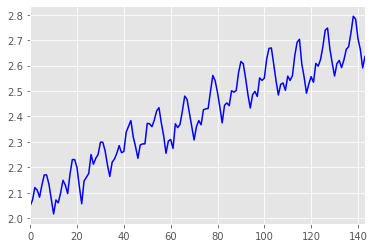

In [59]:
plt.style.use('ggplot')
airline_passengers_log.plot(color='blue');

__Note how after the log transform, the trend became almost linear and how the periodic amplitude remains constant.__

In [60]:
!pip install statsmodels

    100% |████████████████████████████████| 8.2MB 187kB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 649kB/s ta 0:00:01
    100% |████████████████████████████████| 24.8MB 63kB/s eta 0:00:011
  Using cached https://files.pythonhosted.org/packages/d7/b1/3367ea1f372957f97a6752ec725b87886e12af1415216feec9067e31df70/numpy-1.16.5-cp27-cp27mu-manylinux1_x86_64.whl
    100% |████████████████████████████████| 10.1MB 155kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/65/26/32b8464df2a97e6dd1b656ed26b2c194606c16fe163c695a992b36c11cdf/six-1.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e7/f9/f0b53f88060247251bf481fa6ea62cd0d25bf1b11a87888e53ce5b7c8ad2/pytz-2019.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
